In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Micro-Credit Defaulter Model**

Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [5]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# Importing the DataSet

In [6]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, 'Data file.csv’) to DataFrame format.

df = pd.read_csv("/content/drive/MyDrive/Python_Datasets/Data file.csv")

In [7]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

df.head()

Unnamed: 0  label       msisdn  ...  payback90  pcircle       pdate
0           1      0  21408I70789  ...  29.000000      UPW  2016-07-20
1           2      1  76462I70374  ...   0.000000      UPW  2016-08-10
2           3      1  17943I70372  ...   0.000000      UPW  2016-08-19
3           4      1  55773I70781  ...   0.000000      UPW  2016-06-06
4           5      1  03813I82730  ...   2.333333      UPW  2016-06-22

[5 rows x 37 columns]

In [8]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Observation : We have int,float,object type value in different independent variables and label is our target variable where in we have classes .

In [9]:
#The shape of the dataset

df.shape

(209593, 37)

Observation : This shows that our dataset contains 209593 rows i.e. instances of default customers and 37 columns i.e. the specifications like label,aon,pcircle etc.

In [10]:
#Unique occurrences of ‘label’ column

df['label'].unique()

array([0, 1])

Observation : As we can see, there are two unique values in the ‘label’ column of the dataset namely: ‘0’ -> defaulter and ‘1’ -> non-defaulter

In [11]:
#Count of the unique occurrences of ‘label’ column

df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Observation : As we can see, there are 183431 occurrences of non-defaulters and 26162 occurrences of defaulters in the dataset.

In [12]:
#Missing Values

df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

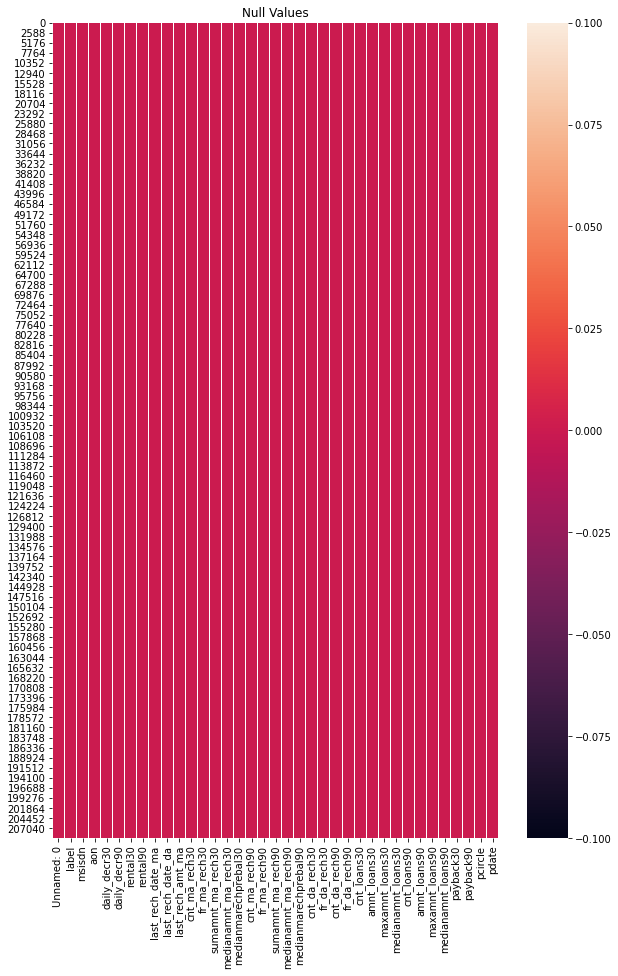

In [13]:
plt.figure(figsize=[10,15])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Observation : There are no missing value in the dataset .

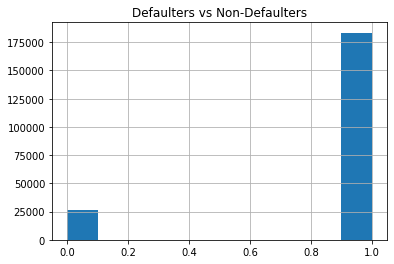

In [14]:
df['label'].hist(grid=True)
plt.title("Defaulters vs Non-Defaulters")
plt.show()

Observation : This is a Class-Imbalance Problem which is needed to be fixed .

In [15]:
df.describe()

Unnamed: 0          label  ...      payback30      payback90
count  209593.000000  209593.000000  ...  209593.000000  209593.000000
mean   104797.000000       0.875177  ...       3.398826       4.321485
std     60504.431823       0.330519  ...       8.813729      10.308108
min         1.000000       0.000000  ...       0.000000       0.000000
25%     52399.000000       1.000000  ...       0.000000       0.000000
50%    104797.000000       1.000000  ...       0.000000       1.666667
75%    157195.000000       1.000000  ...       3.750000       4.500000
max    209593.000000       1.000000  ...     171.500000     171.500000

[8 rows x 34 columns]

# EDA(Exploratory Data Analysis)

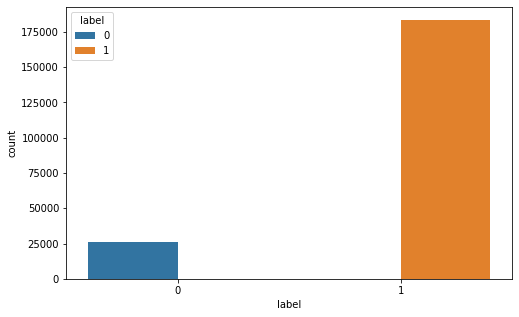

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df , hue="label",saturation=0.75 )
plt.show()

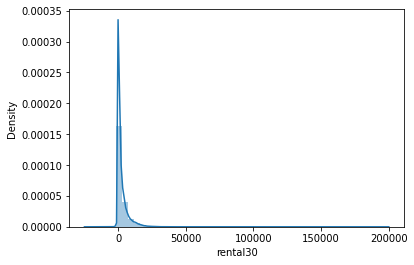

In [17]:
sns.distplot(df['rental30'])

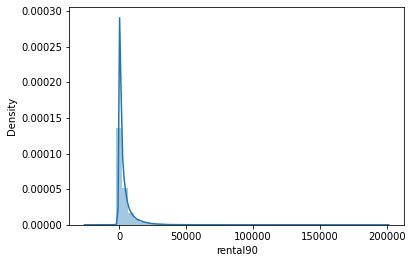

In [18]:
sns.distplot(df['rental90'])

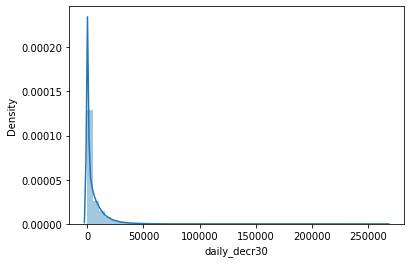

In [19]:
sns.distplot(df['daily_decr30'])

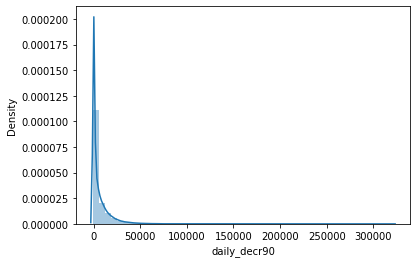

In [20]:
sns.distplot(df['daily_decr90'])

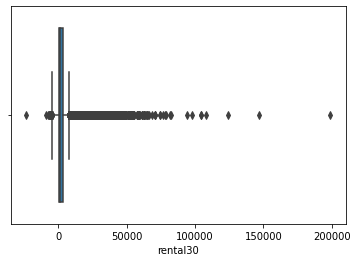

In [21]:
sns.boxplot(df['rental30'])

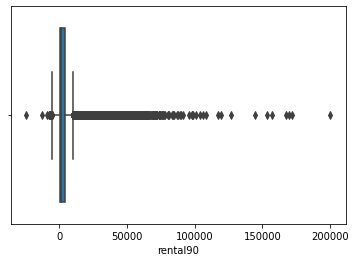

In [22]:
sns.boxplot(df['rental90'])

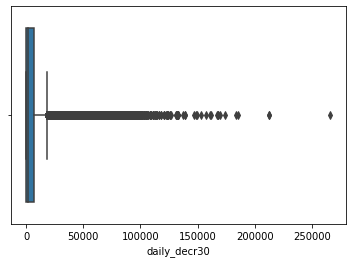

In [23]:
sns.boxplot(df['daily_decr30'])

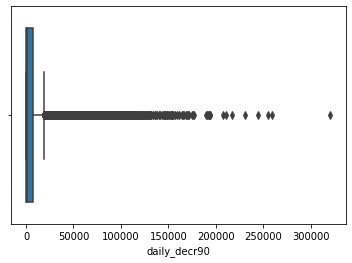

In [24]:
sns.boxplot(df['daily_decr90'])

In [25]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

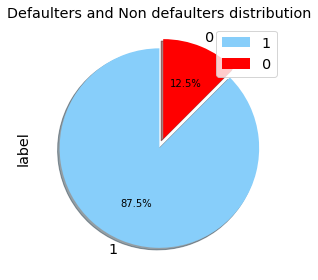

In [26]:
f, ax = plt.subplots(figsize=(7, 4))
order = list(df['label'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue', 'red']
explode = (0,0.1)
df['label'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title("Defaulters and Non defaulters distribution");
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

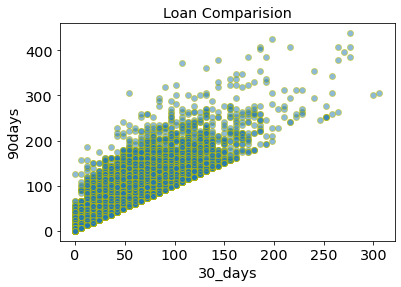

In [27]:
plt.scatter(df['amnt_loans30'],df['amnt_loans90'],alpha=0.5,edgecolors='y')    #Bivariate Analysis
plt.title("Loan Comparision")
plt.xlabel('30_days')
plt.ylabel('90days')
plt.show()

Observation : As we see , there are some outliers which are to be deleted later .

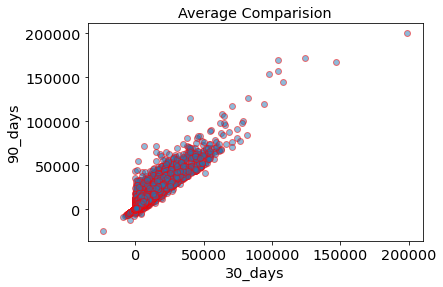

In [28]:
plt.scatter(df['rental30'],df['rental90'],alpha=0.5,edgecolors='r')
plt.title("Average Comparision")
plt.xlabel('30_days')
plt.ylabel('90_days')
plt.show()

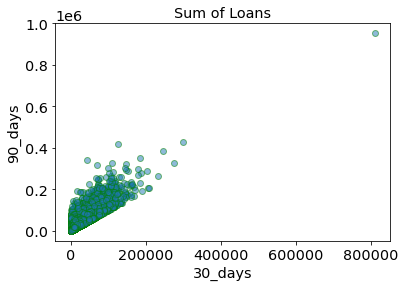

In [29]:
plt.scatter(df['sumamnt_ma_rech30'],df['sumamnt_ma_rech90'],alpha=0.5,edgecolors='g')
plt.title("Sum of Loans")
plt.xlabel('30_days')
plt.ylabel('90_days')
plt.show()

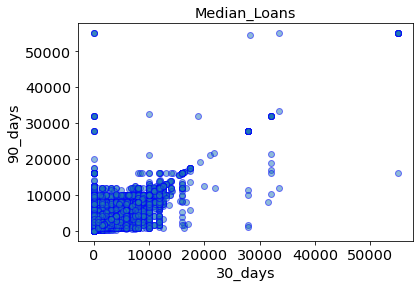

In [30]:
plt.scatter(df['medianamnt_ma_rech30'],df['medianamnt_ma_rech90'],alpha=0.5,edgecolors='b')
plt.title("Median_Loans")
plt.xlabel('30_days')
plt.ylabel('90_days')
plt.show()

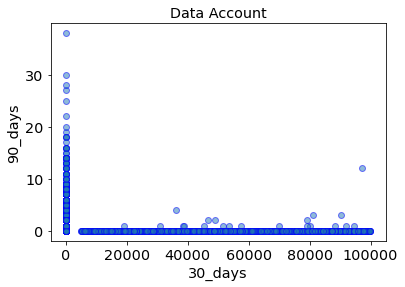

In [31]:
plt.scatter(df['cnt_da_rech30'],df['cnt_da_rech90'],alpha=0.5,edgecolors='b')
plt.title("Data Account")
plt.xlabel('30_days')
plt.ylabel('90_days')
plt.show()

Looks like there are lot of outliers which are needed to be removed

Checking Correlation

In [32]:
cor = df.corr()
cor

Unnamed: 0     label  ...  payback30  payback90
Unnamed: 0              1.000000  0.000403  ...  -0.000040   0.002411
label                   0.000403  1.000000  ...   0.048336   0.049183
aon                    -0.002048 -0.003785  ...   0.001940   0.002203
daily_decr30            0.002739  0.168298  ...   0.026915   0.047175
daily_decr90            0.003077  0.166150  ...   0.019400   0.040800
rental30               -0.003906  0.058085  ...   0.072974   0.095147
rental90               -0.003459  0.075521  ...   0.067110   0.099501
last_rech_date_ma      -0.001853  0.003728  ...  -0.002233  -0.001583
last_rech_date_da      -0.001133  0.001711  ...   0.000077   0.000417
last_rech_amt_ma       -0.001064  0.131804  ...  -0.027369  -0.014260
cnt_ma_rech30           0.003320  0.237331  ...   0.043617   0.017362
fr_ma_rech30            0.003181  0.001330  ...   0.001455   0.000998
sumamnt_ma_rech30       0.000123  0.202828  ...   0.000112  -0.012596
medianamnt_ma_rech30   -0.001371  0.141490  ...  -0.018398  -0.002861
medianmarechprebal30    0.001258 -0.004829  ...   0.001516   0.001811
cnt_ma_rech90           0.002329  0.236392  ...   0.011943  -0.003141
fr_ma_rech90           -0.000249  0.084385  ...   0.036817   0.077529
sumamnt_ma_rech90       0.000523  0.205793  ...  -0.026409  -0.029997
medianamnt_ma_rech90   -0.000298  0.120855  ...  -0.035640  -0.023022
medianmarechprebal90   -0.001947  0.039300  ...  -0.031760  -0.031210
cnt_da_rech30           0.000888  0.003827  ...  -0.000471   0.000382
fr_da_rech30           -0.002504 -0.000027  ...   0.001709  -0.000725
cnt_da_rech90          -0.001324  0.002999  ...   0.013430   0.024046
fr_da_rech90           -0.002827 -0.005418  ...   0.000354   0.001226
cnt_loans30             0.001725  0.196283  ...   0.067842   0.033369
amnt_loans30            0.002387  0.197272  ...   0.060425   0.030901
maxamnt_loans30         0.000698  0.000248  ...  -0.001512  -0.000915
medianamnt_loans30     -0.002005  0.044589  ...  -0.006007   0.003178
cnt_loans90             0.002241  0.004733  ...   0.000587  -0.000476
amnt_loans90            0.000781  0.199788  ...   0.052142   0.029653
maxamnt_loans90         0.001742  0.084144  ...   0.013376   0.029679
medianamnt_loans90     -0.002615  0.035747  ...  -0.013388  -0.010443
payback30              -0.000040  0.048336  ...   1.000000   0.830363
payback90               0.002411  0.049183  ...   0.830363   1.000000

[34 rows x 34 columns]

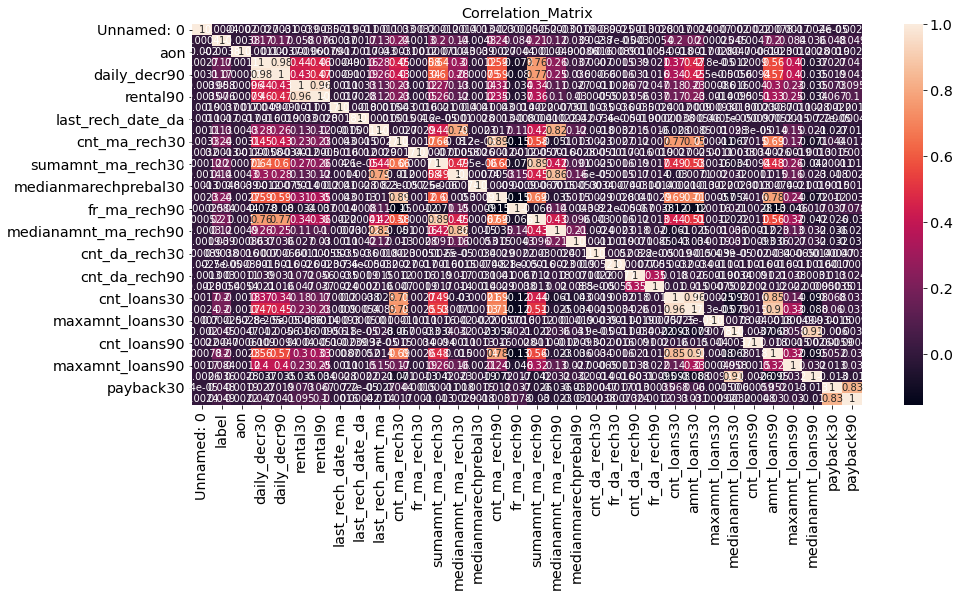

In [33]:
plt.figure(figsize=[15,7])
sns.heatmap(cor,annot=True)
plt.title("Correlation_Matrix")
plt.show()

We need to perform LabelEncoder for object type variables to make it numerical

# Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['pcircle'] = LE.fit_transform(df['pcircle'])
df['pdate'] = LE.fit_transform(df['pdate'])

In [35]:
df.head()

Unnamed: 0  label       msisdn    aon  ...  payback30  payback90  pcircle  pdate
0           1      0  21408I70789  272.0  ...  29.000000  29.000000        0     49
1           2      1  76462I70374  712.0  ...   0.000000   0.000000        0     70
2           3      1  17943I70372  535.0  ...   0.000000   0.000000        0     79
3           4      1  55773I70781  241.0  ...   0.000000   0.000000        0      5
4           5      1  03813I82730  947.0  ...   2.333333   2.333333        0     21

[5 rows x 37 columns]

In [36]:
cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

# Drop Irrelevant Columns

In [37]:
#We'll delete columns from dataset, which doesn't mean much to us here. In this section and later sections, we will go through "encoded_data" which has Label Encoding process and fit to the models accordingly. Now, delete the columns that don't have much to do with other attributes from the dataset:

df.drop(["Unnamed: 0","msisdn", "aon","pdate" ,"pcircle"], axis=1, inplace=True)  # Drop "cap-shape" and "veil-type" columns from dataset
df.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [38]:
df.head()

label  daily_decr30  daily_decr90  ...  medianamnt_loans90  payback30  payback90
0      0   3055.050000   3065.150000  ...                 0.0  29.000000  29.000000
1      1  12122.000000  12124.750000  ...                 0.0   0.000000   0.000000
2      1   1398.000000   1398.000000  ...                 0.0   0.000000   0.000000
3      1     21.228000     21.228000  ...                 0.0   0.000000   0.000000
4      1    150.619333    150.619333  ...                 0.0   2.333333   2.333333

[5 rows x 32 columns]

# Cleaning the Data

1.Checking Missing Values

In [39]:
df.isnull().sum()

label                   0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

Observation : No Missing Values

2.Checking Outliers

In [40]:
from scipy.stats import zscore

z = np.abs(zscore(df))
new_df=df [(z<3).all(axis=1)]

In [41]:
new_df.shape

(163063, 32)

In [42]:
df.shape

(209593, 32)

In [43]:
df.shape[0] - new_df.shape[0]

46530

Observation : It looks like there are lot of outliers but removing this would be a loss of huge amount of data from dataset and we can't afford loosing more than 7-8% of data . Hence we will continue with outliers .

3.Checking Skewness

In [44]:
df.skew()

label                   -2.270254
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

Observation : Here we have to remove skewness in almost all variables .

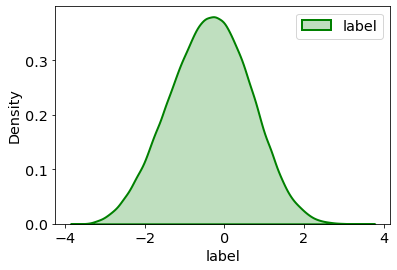

In [45]:
from scipy import stats
new_df['label'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['label'], fitted_lambda = stats.boxcox(new_df['label'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['label'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green")

# adding legends to the subplots
plt.legend(loc = "upper right")

Lambda value used for Transformation: 0.26564705395478927


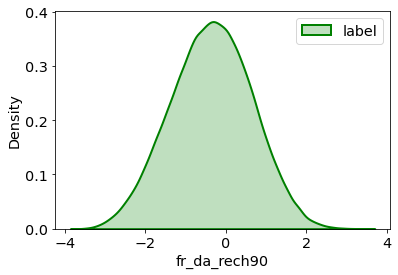

In [46]:
from scipy import stats
new_df['fr_da_rech90'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['fr_da_rech90'], fitted_lambda = stats.boxcox(new_df['fr_da_rech90'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['fr_da_rech90'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.2653200665928955


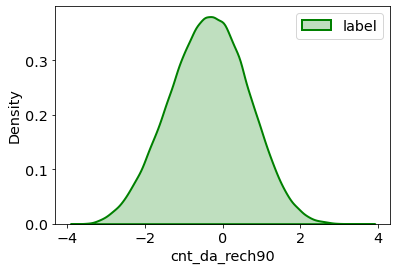

In [47]:
from scipy import stats
new_df['cnt_da_rech90'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['cnt_da_rech90'], fitted_lambda = stats.boxcox(new_df['cnt_da_rech90'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['cnt_da_rech90'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.26790838240095843


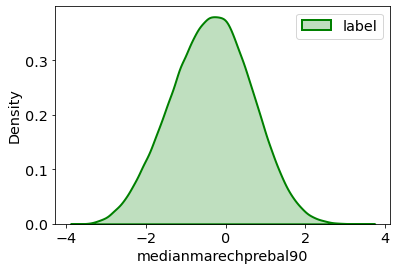

In [48]:
from scipy import stats
new_df['medianmarechprebal90'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['medianmarechprebal90'], fitted_lambda = stats.boxcox(new_df['medianmarechprebal90'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['medianmarechprebal90'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.26536617950940666


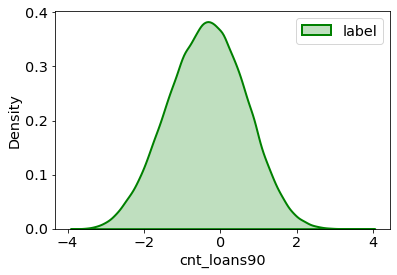

In [49]:
from scipy import stats
new_df['cnt_loans90'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['cnt_loans90'], fitted_lambda = stats.boxcox(new_df['cnt_loans90'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['cnt_loans90'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.2661320262138921


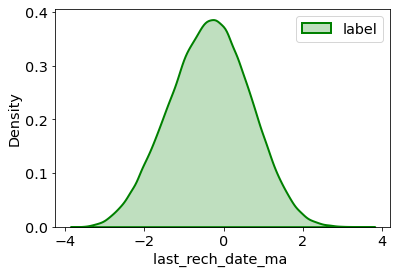

In [50]:
from scipy import stats
new_df['last_rech_date_ma '] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['last_rech_date_ma '], fitted_lambda = stats.boxcox(new_df['last_rech_date_ma '])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['last_rech_date_ma '], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.2671160043189645


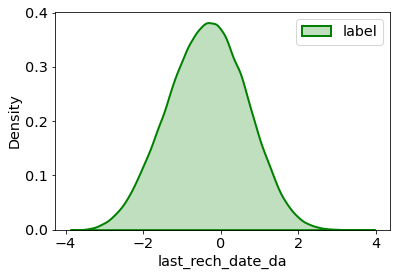

In [51]:
from scipy import stats
new_df['last_rech_date_da'] = np.random.exponential(size = 163063)
  
#transform training data & save lambda value
new_df['last_rech_date_da'], fitted_lambda = stats.boxcox(new_df['last_rech_date_da'])
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(new_df['last_rech_date_da'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "label", color ="green",)

# adding legends to the subplots
plt.legend(loc = "upper right")
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [52]:
new_df.skew()

label                   -0.040086
daily_decr30             1.963933
daily_decr90             2.078185
rental30                 2.196663
rental90                 2.246622
last_rech_date_ma        3.103877
last_rech_date_da       -0.038384
last_rech_amt_ma         2.125988
cnt_ma_rech30            1.175865
fr_ma_rech30             2.004814
sumamnt_ma_rech30        1.634192
medianamnt_ma_rech30     2.326728
medianmarechprebal30    10.500496
cnt_ma_rech90            1.321559
fr_ma_rech90             1.983838
sumamnt_ma_rech90        1.707738
medianamnt_ma_rech90     2.373562
medianmarechprebal90    -0.039037
cnt_da_rech30           51.011843
fr_da_rech30             0.000000
cnt_da_rech90           -0.037061
fr_da_rech90            -0.037918
cnt_loans30              1.466140
amnt_loans30             1.441626
maxamnt_loans30         53.734717
medianamnt_loans30       5.347700
cnt_loans90             -0.037178
amnt_loans90             1.695240
maxamnt_loans90          2.682372
medianamnt_loa

Observation : As we can see , all variable have skewness in between -0.5 to 0.5 .Hence all data are skewed and cleaned . 

# Split Data and Target

In [53]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the class of the mushroom, we will drop the ‘class’ column.
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X = df.drop(['label'], axis=1)
y = df["label"]

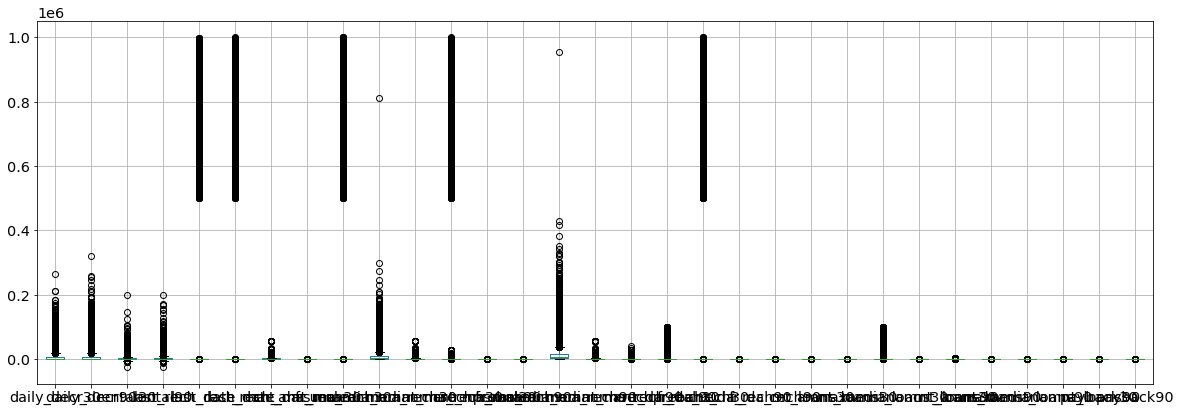

In [54]:
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [55]:
X

daily_decr30  daily_decr90  ...  payback30  payback90
0        3055.050000   3065.150000  ...  29.000000  29.000000
1       12122.000000  12124.750000  ...   0.000000   0.000000
2        1398.000000   1398.000000  ...   0.000000   0.000000
3          21.228000     21.228000  ...   0.000000   0.000000
4         150.619333    150.619333  ...   2.333333   2.333333
...              ...           ...  ...        ...        ...
209588    151.872333    151.872333  ...   1.000000   1.000000
209589     36.936000     36.936000  ...   1.000000   1.000000
209590  11843.111667  11904.350000  ...   4.000000   3.833333
209591  12488.228333  12574.370000  ...   0.000000  10.500000
209592   4489.362000   4534.820000  ...   0.000000   0.000000

[209593 rows x 31 columns]

In [56]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

# #Treating with Class Imbalance

In [57]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

# Scaling of Data

Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [58]:
from sklearn.preprocessing import StandardScaler  # Import StandartScaler class
std_scaler = StandardScaler()  # Create instance for scaler

x_over = std_scaler.fit_transform(x_over)  # Fit and transform data with scaler

# Preparation of Test and Train Data

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [59]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [99]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
features_label = df.columns
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) label                          0.145008
 2) daily_decr30                   0.129697
 3) daily_decr90                   0.077088
 4) rental30                       0.076263
 5) rental90                       0.075079
 6) last_rech_date_ma              0.052707
 7) last_rech_date_da              0.048207
 8) last_rech_amt_ma               0.047944
 9) cnt_ma_rech30                  0.042716
10) fr_ma_rech30                   0.037365
11) sumamnt_ma_rech30              0.030000
12) medianamnt_ma_rech30           0.029928
13) medianmarechprebal30           0.024770
14) cnt_ma_rech90                  0.021473
15) fr_ma_rech90                   0.021300
16) sumamnt_ma_rech90              0.020850
17) medianamnt_ma_rech90           0.020583
18) medianmarechprebal90           0.018329
19) cnt_da_rech30                  0.017499
20) fr_da_rech30                   0.014645
21) cnt_da_rech90                  0.012590
22) fr_da_rech90                   0.010022
23) cnt_loans30                 

# Feature **Importance**

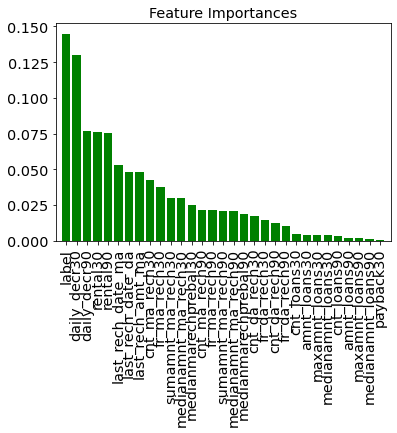

In [100]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# MODELLING

1.Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
#Predicting and estimating the result

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", DecisionTreeClassifier(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                       criterion=array([0, 1, 1, ..., 1, 0, 0]), max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None,
                       splitter=array([0, 1, 1, ..., 1, 0, 0]))
Test Accuracy: 90.32%


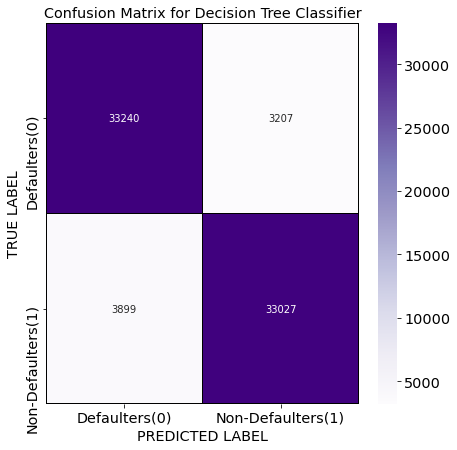

In [63]:
#Confusion Matrix for Decision Tree Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
y_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [64]:
#Computing auc score

auc = roc_auc_score(y_test,y_pred_dt)
print('AUC: %.2f' % auc)

AUC: 0.90


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

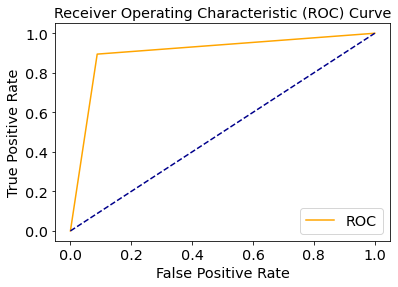

In [66]:
#Plot ROC Curve using our defined function
# DECISION_TREE_CLASSIFIER

plot_roc_curve(fpr, tpr)

2.Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 75.76%


In [68]:
#Classification report of Logistic Regression Classifier

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", LogisticRegression(y_test, y_pred_lr))

Logistic Regression Classifier report: 

 LogisticRegression(C=1.0, class_weight=None,
                   dual=array([0, 0, 1, ..., 1, 0, 0]), fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None,
                   penalty=array([0, 1, 1, ..., 1, 0, 0]), random_state=None,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


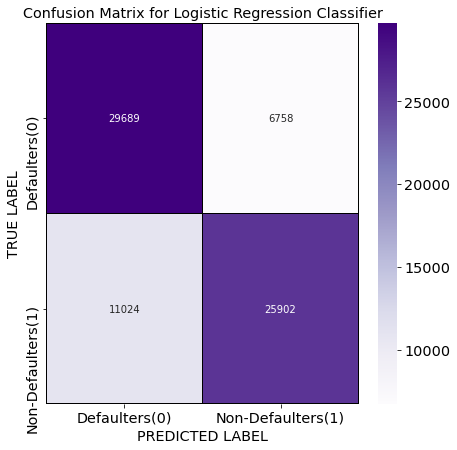

In [69]:
#Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
y_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


In [70]:
#Computing auc score

auc = roc_auc_score(y_test,y_pred_lr)
print('AUC: %.2f' % auc)

AUC: 0.76


In [71]:
 #Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

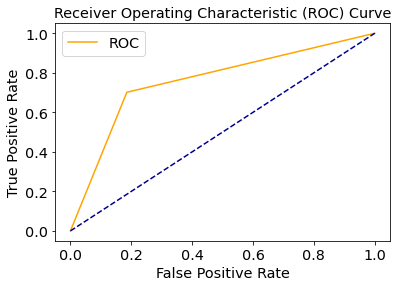

In [72]:
#Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

3.Naive Bayes Classification

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 69.9%


In [74]:
#Classification report of Naive Bayes Classifier

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", GaussianNB(y_test, y_pred_nb))

Naive Bayes Classifier report: 

 GaussianNB(priors=array([0, 1, 1, ..., 1, 0, 0]),
           var_smoothing=array([0, 1, 1, ..., 1, 0, 0]))


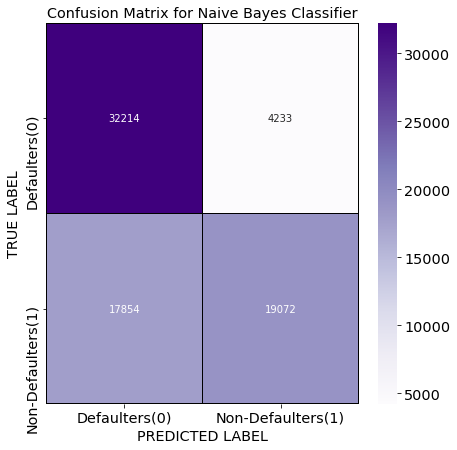

In [75]:
#Confusion Matrix for Naive Bayes Classifier

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
y_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [76]:
#Compute the AUC Score.

auc = roc_auc_score(y_test, y_pred_nb)
print('AUC: %.2f' % auc)

AUC: 0.70


In [77]:
#Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)

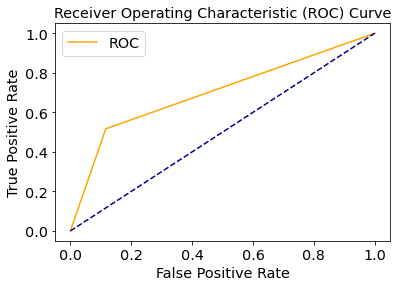

In [78]:
#Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

4.Random Forest Classification

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 94.06%


In [80]:
#Classification report of Random Forest Classifier

y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", RandomForestClassifier(y_test, y_pred_rf))

Random Forest Classifier report: 

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion=array([0, 0, 1, ..., 1, 0, 0]), max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=array([0, 1, 1, ..., 1, 0, 0]), n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


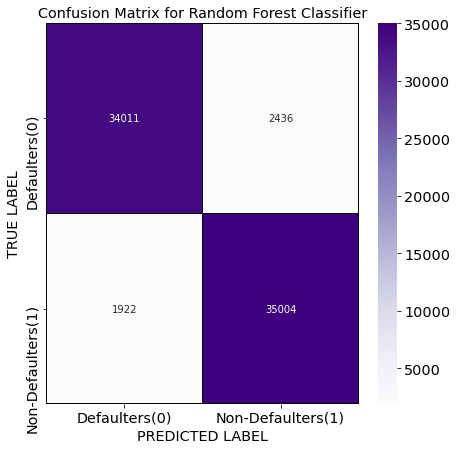

In [81]:
#Confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
y_axis_labels = ["Defaulters(0)", "Non-Defaulters(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [82]:
#Compute the AUC Score.

auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.2f' % auc)

AUC: 0.94


In [83]:
#Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

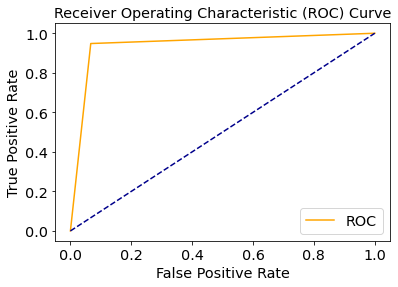

In [84]:
#Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

# Computing Cross Validation¶

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
print(cross_val_score(dt,X,y,cv=5).mean())

0.8663123374237287


In [87]:
print(cross_val_score(lr,X,y,cv=5).mean())

0.8790703896269036


In [88]:
print(cross_val_score(nb,X,y,cv=5).mean())

0.5505766139280509


In [89]:
print(cross_val_score(rf,X,y,cv=5).mean())

0.9123157799479099


# Hyper parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameter={'max_depth': np.arange(2,10),
            'criterion':['gini','entropy']}

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [93]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [94]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [95]:
Final_mod = RandomForestClassifier(criterion='entropy',max_depth=4)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.92585828574543


# Predictions

In [96]:
#Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest Classifier.

preds = rf.predict(X_test)
print("# 0 - defaulters")
print("# 1 - non-defaulters")
print(preds[:36])
print(y_test[:36])
# 0 - defaulters
# 1 - non-defaulters

# 0 - defaulters
# 1 - non-defaulters
[0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0]
[0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0]


# Saving the model

In [97]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

## Table of Contents

### [Preface](00.00-Preface.ipynb)

### [1. IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)
- [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)
- [Keyboard Shortcuts in the IPython Shell](01.02-Shell-Keyboard-Shortcuts.ipynb)
- [IPython Magic Commands](01.03-Magic-Commands.ipynb)
- [Input and Output History](01.04-Input-Output-History.ipynb)
- [IPython and Shell Commands](01.05-IPython-And-Shell-Commands.ipynb)
- [Errors and Debugging](01.06-Errors-and-Debugging.ipynb)
- [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb)
- [More IPython Resources](01.08-More-IPython-Resources.ipynb)

### [2. Introduction to NumPy](02.00-Introduction-to-NumPy.ipynb)
- [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)
- [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)
- [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)
- [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb)
- [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)
- [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)
- [Fancy Indexing](02.07-Fancy-Indexing.ipynb)
- [Sorting Arrays](02.08-Sorting.ipynb)
- [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb)

### [3. Data Manipulation with Pandas](03.00-Introduction-to-Pandas.ipynb)
- [Introducing Pandas Objects](03.01-Introducing-Pandas-Objects.ipynb)
- [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)
- [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb)
- [Handling Missing Data](03.04-Missing-Values.ipynb)
- [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)
- [Combining Datasets: Concat and Append](03.06-Concat-And-Append.ipynb)
- [Combining Datasets: Merge and Join](03.07-Merge-and-Join.ipynb)
- [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)
- [Pivot Tables](03.09-Pivot-Tables.ipynb)
- [Vectorized String Operations](03.10-Working-With-Strings.ipynb)
- [Working with Time Series](03.11-Working-with-Time-Series.ipynb)
- [High-Performance Pandas: eval() and query()](03.12-Performance-Eval-and-Query.ipynb)
- [Further Resources](03.13-Further-Resources.ipynb)

### [4. Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb)
- [Simple Line Plots](04.01-Simple-Line-Plots.ipynb)
- [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb)
- [Visualizing Errors](04.03-Errorbars.ipynb)
- [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)
- [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb)
- [Customizing Plot Legends](04.06-Customizing-Legends.ipynb)
- [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb)
- [Multiple Subplots](04.08-Multiple-Subplots.ipynb)
- [Text and Annotation](04.09-Text-and-Annotation.ipynb)
- [Customizing Ticks](04.10-Customizing-Ticks.ipynb)
- [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb)
- [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb)
- [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb)
- [Visualization with Seaborn](04.14-Visualization-With-Seaborn.ipynb)
- [Further Resources](04.15-Further-Resources.ipynb)

### [5. Machine Learning](05.00-Machine-Learning.ipynb)
- [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb)
- [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb)
- [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)
- [Feature Engineering](05.04-Feature-Engineering.ipynb)
- [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)
- [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)
- [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)
- [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)
- [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)
- [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)
- [In Depth: k-Means Clustering](05.11-K-Means.ipynb)
- [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)
- [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb)
- [Application: A Face Detection Pipeline](05.14-Image-Features.ipynb)
- [Further Machine Learning Resources](05.15-Learning-More.ipynb)

### [Appendix: Figure Code](06.00-Figure-Code.ipynb)